In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
#########################################################

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

MCC_scorer = make_scorer(matthews_corrcoef)
#######################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [6]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1 = data1.loc[data1['CASE_NUMBER'] <= 'Case 223']
data1['PATH'] = data1['PATH'].str.replace("PruebasCITOBOT_Anon/", "PruebasCITOBOT_AnonSEG/")
data1 = data1[data1['CASE_NUMBER'] != 'Case 169']
data1['DIAGN'] = data1['DIAGN'].replace({3: 2})
data1['DIAGN'] = data1['DIAGN'].replace({4: 2})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    265
1    116
2     34
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_AnonSEG/Case 003/,0
...,...,...,...,...,...
505,Case 220,2,20230530100347.jpg,PruebasCITOBOT_AnonSEG/Case 220/,1
506,Case 221,2,20230530094711.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
507,Case 221,2,20230530094612.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
511,Case 223,2,20230530093319.jpg,PruebasCITOBOT_AnonSEG/Case 223/,0


In [7]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({3: 2})
print(data2['DIAGN'].value_counts())
data2

2    464
1    133
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,2
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,2


In [8]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
#dataC1 = data3[data3['DIAGN'] == 0]
#dataC2 = data3[data3['DIAGN'] == 1]
#data_aleatoria = dataC1.sample(n=531)
#data_aleatoria2 = dataC2.sample(n=58)
#data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1    192
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,P100316,2,I389059.jpg,training_SEG/Biopsy_Study/,1
1,P101187,2,I687505.jpg,training_SEG/Biopsy_Study/,0
4,P110406,5,I239297.jpg,training_SEG/Biopsy_Study/,0
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
...,...,...,...,...,...
76652,P899409,5,I325700_C2.jpg,training_SEG/NHS/,0
76653,P899409,5,I553280_C1.jpg,training_SEG/NHS/,0
76654,P899409,5,I553280_C2.jpg,training_SEG/NHS/,0
76655,P899409,5,I853803_C1.jpg,training_SEG/NHS/,0


In [9]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
#data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC0 = data4[data4['DIAGN'] == 0]
dataC1 = data4[data4['DIAGN'] == 1]
dataC2 = data4[data4['DIAGN'] == 2]
data_aleatoria0 = dataC0.sample(n=244)
data_aleatoria1 = dataC1.sample(n=574)
data_aleatoria2 = dataC2.sample(n=435)
data4 = pd.concat([data_aleatoria0, data_aleatoria1, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

1    574
2    435
0    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
12,0,0,1040.jpg,Kaggle_SEG/Type_1/,0
68,0,0,139.jpg,Kaggle_SEG/Type_1/,0
69,0,0,1390.jpg,Kaggle_SEG/Type_1/,0
236,0,0,930.jpg,Kaggle_SEG/Type_1/,0
102,0,0,245.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
1204,0,0,228.jpg,Kaggle_SEG/Type_3/,2
1166,0,0,1455.jpg,Kaggle_SEG/Type_3/,2
1409,0,0,822.jpg,Kaggle_SEG/Type_3/,2
1079,0,0,1162.jpg,Kaggle_SEG/Type_3/,2


In [10]:
data = pd.concat([data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
1204,0,0,228.jpg,Kaggle_SEG/Type_3/,2
1166,0,0,1455.jpg,Kaggle_SEG/Type_3/,2
1409,0,0,822.jpg,Kaggle_SEG/Type_3/,2
1079,0,0,1162.jpg,Kaggle_SEG/Type_3/,2


In [11]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    899
1    899
2    899
Name: DIAGN, dtype: int64


In [12]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [13]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  img = tf.image.random_flip_left_right(img)  # voltear horizontalmente aleatoriamente
  img = tf.image.random_brightness(img, max_delta=0.1)  # cambiar brillo aleatoriamente
  img = tf.image.random_contrast(img, lower=0.9, upper=1.1)  # cambiar contraste aleatoriamente
  img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
  img = tf.image.random_saturation(img, lower=0.7, upper=1.3)
  img = tf.image.random_hue(img, max_delta=0.1)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [14]:
#Cargar los path de las imagenes para el pipeline
dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
path_data = dataPathDrive + data["PATH"] + data['IMAGE_ID']
path_data = np.array(path_data)

#Convertir en tensores
data_tensor = tf.data.Dataset.from_tensor_slices(path_data)

#Procesar y Cargar Imagenes
data_tensor = data_tensor.map(process_image)

dataset = tf.data.Dataset.from_tensor_slices(to_categorical(data['DIAGN'], 3))
dataset = tf.data.Dataset.zip((data_tensor,dataset))

DATA = dataset.batch(batch_size=64)

# Preprocessing is needed

In [15]:
from keras.applications import ResNet50

# Cargar el modelo pre-entrenado de ResNet50
ResNet50model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

# Establecer las capas como no entrenables
for layer in ResNet50model.layers:
    layer.trainable = False

ResNet50model.summary()  # Los parámetros entrenables serán 0

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                      

In [16]:
feature_extractor = ResNet50model.predict(DATA)

43/43 [==============================] - 2204s 51s/step


In [17]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(2697, 100352)


# **Sin Reduccion**

In [18]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(2697, 100352)


**UNET 1D**

Iteracion:  1
Epoch 1/300
216/216 [==============================] - 162s 680ms/step - loss: 1.1602 - accuracy: 0.3959 - val_loss: 1.0201 - val_accuracy: 0.4444
Epoch 2/300
216/216 [==============================] - 140s 647ms/step - loss: 1.0316 - accuracy: 0.4719 - val_loss: 1.0322 - val_accuracy: 0.4491
Epoch 3/300
216/216 [==============================] - 140s 650ms/step - loss: 1.0026 - accuracy: 0.5067 - val_loss: 0.9895 - val_accuracy: 0.5231
Epoch 4/300
216/216 [==============================] - 141s 654ms/step - loss: 0.9679 - accuracy: 0.5136 - val_loss: 1.0176 - val_accuracy: 0.5347
Epoch 5/300
216/216 [==============================] - 141s 651ms/step - loss: 0.9445 - accuracy: 0.5374 - val_loss: 1.0377 - val_accuracy: 0.5023
Epoch 6/300
216/216 [==============================] - 143s 661ms/step - loss: 0.9191 - accuracy: 0.5594 - val_loss: 1.0418 - val_accuracy: 0.4954
Epoch 7/300
216/216 [==============================] - 145s 673ms/step - loss: 0.9056 - accuracy: 0.5693

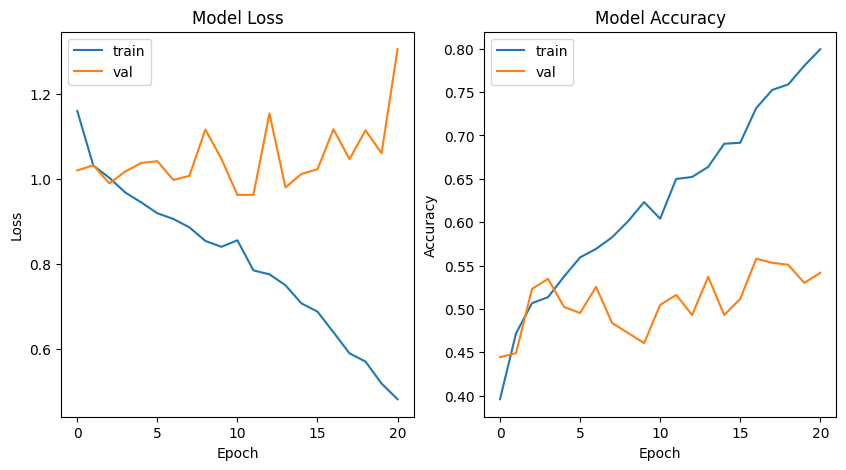

17/17 [==============================] - 31s 1s/step
Clase 0:
Especificidad: 0.6173913043478261
Sensibilidad: 0.7897435897435897

Clase 1:
Especificidad: 0.7692307692307693
Sensibilidad: 0.5113636363636364

Clase 2:
Especificidad: 0.9272237196765498
Sensibilidad: 0.3136094674556213


Matriz de Confusión:
[[154  32   9]
 [ 68  90  18]
 [ 64  52  53]]
Specificity:  [0.6173913043478261, 0.7692307692307693, 0.9272237196765498]
Sensitivity:  [0.7897435897435897, 0.5113636363636364, 0.3136094674556213]
Accuracy:  0.55
Precision:  [0.53846154 0.51724138 0.6625    ]
Recall:     [0.78974359 0.51136364 0.31360947]
F1score:    [0.64033264 0.51428571 0.42570281]
Iteracion:  2
Epoch 1/300
216/216 [==============================] - 148s 659ms/step - loss: 1.1311 - accuracy: 0.4354 - val_loss: 1.0298 - val_accuracy: 0.4653
Epoch 2/300
216/216 [==============================] - 140s 647ms/step - loss: 1.0437 - accuracy: 0.4661 - val_loss: 1.0028 - val_accuracy: 0.4977
Epoch 3/300
216/216 [============

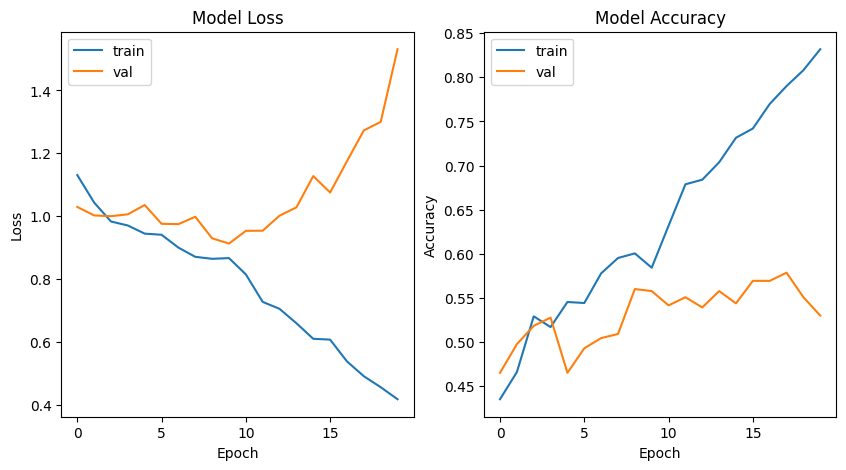

17/17 [==============================] - 14s 840ms/step
Clase 0:
Especificidad: 0.723463687150838
Sensibilidad: 0.6098901098901099

Clase 1:
Especificidad: 0.8907563025210085
Sensibilidad: 0.33879781420765026

Clase 2:
Especificidad: 0.6602739726027397
Sensibilidad: 0.6


Matriz de Confusión:
[[111  19  52]
 [ 49  62  72]
 [ 50  20 105]]
Specificity:  [0.723463687150838, 0.8907563025210085, 0.6602739726027397]
Sensitivity:  [0.6098901098901099, 0.33879781420765026, 0.6]
Accuracy:  0.5148148148148148
Precision:  [0.52857143 0.61386139 0.45851528]
Recall:     [0.60989011 0.33879781 0.6       ]
F1score:    [0.56632653 0.43661972 0.51980198]
Iteracion:  3
Epoch 1/300
216/216 [==============================] - 149s 666ms/step - loss: 1.0815 - accuracy: 0.4041 - val_loss: 1.0697 - val_accuracy: 0.3912
Epoch 2/300
216/216 [==============================] - 143s 661ms/step - loss: 1.0187 - accuracy: 0.4754 - val_loss: 0.9811 - val_accuracy: 0.5532
Epoch 3/300
216/216 [=========================

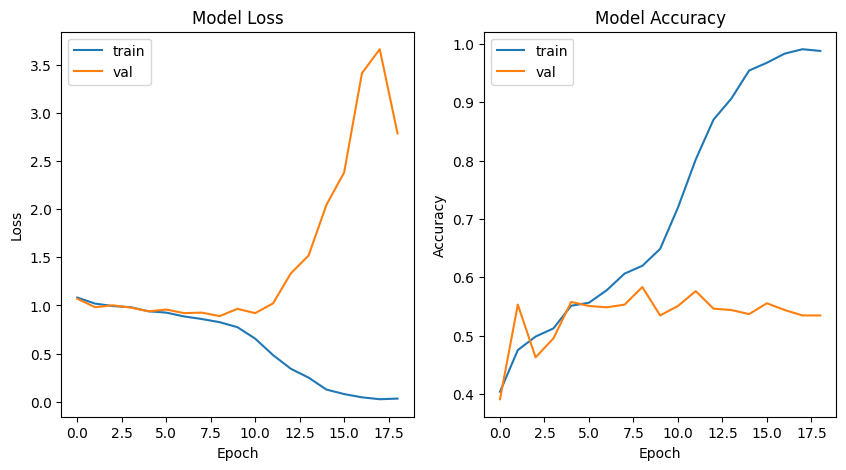

17/17 [==============================] - 14s 837ms/step
Clase 0:
Especificidad: 0.7142857142857143
Sensibilidad: 0.6647727272727273

Clase 1:
Especificidad: 0.9318181818181818
Sensibilidad: 0.26063829787234044

Clase 2:
Especificidad: 0.6510989010989011
Sensibilidad: 0.6761363636363636


Matriz de Confusión:
[[117   9  50]
 [ 62  49  77]
 [ 42  15 119]]
Specificity:  [0.7142857142857143, 0.9318181818181818, 0.6510989010989011]
Sensitivity:  [0.6647727272727273, 0.26063829787234044, 0.6761363636363636]
Accuracy:  0.5277777777777778
Precision:  [0.52941176 0.67123288 0.48373984]
Recall:     [0.66477273 0.2606383  0.67613636]
F1score:    [0.58942065 0.37547893 0.56398104]
Iteracion:  4
Epoch 1/300
216/216 [==============================] - 149s 663ms/step - loss: 1.1281 - accuracy: 0.4180 - val_loss: 1.0455 - val_accuracy: 0.4375
Epoch 2/300
216/216 [==============================] - 141s 655ms/step - loss: 1.0174 - accuracy: 0.4725 - val_loss: 1.1691 - val_accuracy: 0.3981
Epoch 3/300
21

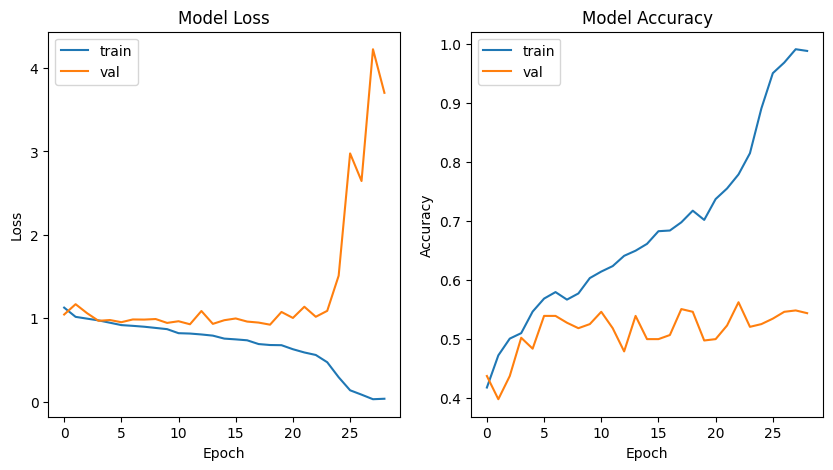

17/17 [==============================] - 14s 840ms/step
Clase 0:
Especificidad: 0.7574123989218329
Sensibilidad: 0.6863905325443787

Clase 1:
Especificidad: 0.75
Sensibilidad: 0.5795454545454546

Clase 2:
Especificidad: 0.8463768115942029
Sensibilidad: 0.4512820512820513


Matriz de Confusión:
[[116  29  24]
 [ 45 102  29]
 [ 45  62  88]]
Specificity:  [0.7574123989218329, 0.75, 0.8463768115942029]
Sensitivity:  [0.6863905325443787, 0.5795454545454546, 0.4512820512820513]
Accuracy:  0.5666666666666667
Precision:  [0.5631068  0.52849741 0.62411348]
Recall:     [0.68639053 0.57954545 0.45128205]
F1score:    [0.61866667 0.55284553 0.52380952]
Iteracion:  5
Epoch 1/300
216/216 [==============================] - 145s 649ms/step - loss: 1.1336 - accuracy: 0.3913 - val_loss: 1.0394 - val_accuracy: 0.4815
Epoch 2/300
216/216 [==============================] - 138s 639ms/step - loss: 1.0085 - accuracy: 0.4812 - val_loss: 1.0122 - val_accuracy: 0.5278
Epoch 3/300
216/216 [=======================

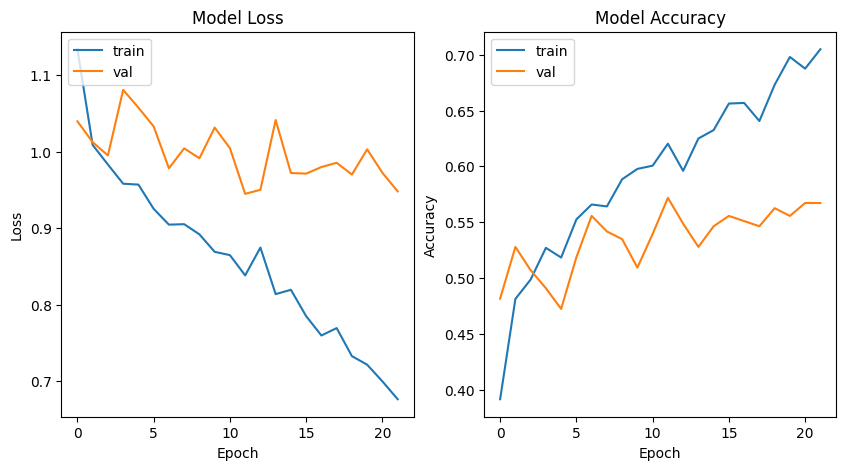

17/17 [==============================] - 14s 837ms/step
Clase 0:
Especificidad: 0.6292134831460674
Sensibilidad: 0.7608695652173914

Clase 1:
Especificidad: 0.7982708933717579
Sensibilidad: 0.42487046632124353

Clase 2:
Especificidad: 0.8806366047745358
Sensibilidad: 0.43558282208588955


Matriz de Confusión:
[[140  31  13]
 [ 79  82  32]
 [ 53  39  71]]
Specificity:  [0.6292134831460674, 0.7982708933717579, 0.8806366047745358]
Sensitivity:  [0.7608695652173914, 0.42487046632124353, 0.43558282208588955]
Accuracy:  0.5425925925925926
Precision:  [0.51470588 0.53947368 0.61206897]
Recall:     [0.76086957 0.42487047 0.43558282]
F1score:    [0.61403509 0.47536232 0.50896057]
Media
Specificity:  [0.68835332 0.82801523 0.793122  ]  |  Sensitivity:  [0.7023333  0.42304313 0.49532214]
Accuracy:  0.5403703703703704  |  Precision:  0.5590334471894832  |  Recall:  0.5402328598958965  |  F1score:  0.528375314581363

Desviacion
Specificity:  [0.05514982 0.07090587 0.11514974]  |  Sensitivity:  [0.0

In [19]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(3, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 3), epochs=300,  batch_size=8, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 3)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(x_test)
  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  #split_data1, split_data = features_data[:data1.shape[0]], features_data[data1.shape[0]:]
  #x_train, x_test, y_train, y_test = train_test_split(split_data1, data1['DIAGN'], test_size=0.5)
  #x_train = pd.concat([x_train, split_data])
  #y_train = pd.concat([y_train, data2['DIAGN'],data3['DIAGN']])

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Clase 0:
Especificidad: 0.7716763005780347
Sensibilidad: 0.634020618556701

Clase 1:
Especificidad: 0.9090909090909091
Sensibilidad: 0.3723404255319149

Clase 2:
Especificidad: 0.6884816753926701
Sensibilidad: 0.740506329113924


Matriz de Confusión:
[[123  17  54]
 [ 53  70  65]
 [ 26  15 117]]
Specificity:  [0.7716763005780347, 0.9090909090909091, 0.6884816753926701]
Sensitivity:  [0.634020618556701, 0.3723404255319149, 0.740506329113924]
Accuracy:  0.5740740740740741
Precision:  [0.60891089 0.68627451 0.49576271]
Recall:     [0.63402062 0.37234043 0.74050633]
F1score:    [0.62121212 0.48275862 0.59390863]
Iteracion:  2
Clase 0:
Especificidad: 0.7707182320441989
Sensibilidad: 0.6348314606741573

Clase 1:
Especificidad: 0.8674033149171271
Sensibilidad: 0.43820224719101125

Clase 2:
Especificidad: 0.7331460674157303
Sensibilidad: 0.6684782608695652


Matriz de Confusión:
[[113  20  45]
 [ 50  78  50]
 [ 33  28 123]]
Specificity:  [0.7707182320441989, 0.8674033149171271, 0

**LogisticRegression**

In [21]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.7984084880636605
Sensibilidad: 0.6625766871165644

Clase 1:
Especificidad: 0.8158640226628895
Sensibilidad: 0.5026737967914439

Clase 2:
Especificidad: 0.7485714285714286
Sensibilidad: 0.5736842105263158


Matriz de Confusión:
[[108  27  28]
 [ 33  94  60]
 [ 43  38 109]]
Specificity:  [0.7984084880636605, 0.8158640226628895, 0.7485714285714286]
Sensitivity:  [0.6625766871165644, 0.5026737967914439, 0.5736842105263158]
Accuracy:  0.575925925925926
Precision:  [0.58695652 0.59119497 0.55329949]
Recall:     [0.66257669 0.5026738  0.57368421]
F1score:    [0.62247839 0.5433526  0.56330749]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.7431693989071039
Sensibilidad: 0.6494252873563219

Clase 1:
Especificidad: 0.8032786885245902
Sensibilidad: 0.4425287356321839

Clase 2:
Especificidad: 0.7614942528735632
Sensibilidad: 0.5260416666666666


Matriz de Confusión:
[[113  32  29]
 [ 43  77  54]
 [ 51  40 101]]
Specificity:  [0.7431693989071039, 0.8032786885245902, 0.7614942528735632]
Sensitivity:  [0.6494252873563219, 0.4425287356321839, 0.5260416666666666]
Accuracy:  0.5388888888888889
Precision:  [0.54589372 0.51677852 0.54891304]
Recall:     [0.64942529 0.44252874 0.52604167]
F1score:    [0.59317585 0.47678019 0.53723404]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.7833333333333333
Sensibilidad: 0.6

Clase 1:
Especificidad: 0.8357348703170029
Sensibilidad: 0.5077720207253886

Clase 2:
Especificidad: 0.7372654155495979
Sensibilidad: 0.6047904191616766


Matriz de Confusión:
[[108  26  46]
 [ 43  98  52]
 [ 35  31 101]]
Specificity:  [0.7833333333333333, 0.8357348703170029, 0.7372654155495979]
Sensitivity:  [0.6, 0.5077720207253886, 0.6047904191616766]
Accuracy:  0.5685185185185185
Precision:  [0.58064516 0.63225806 0.50753769]
Recall:     [0.6        0.50777202 0.60479042]
F1score:    [0.59016393 0.56321839 0.55191257]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.7945205479452054
Sensibilidad: 0.6571428571428571

Clase 1:
Especificidad: 0.828169014084507
Sensibilidad: 0.4756756756756757

Clase 2:
Especificidad: 0.7416666666666667
Sensibilidad: 0.6


Matriz de Confusión:
[[115  22  38]
 [ 42  88  55]
 [ 33  39 108]]
Specificity:  [0.7945205479452054, 0.828169014084507, 0.7416666666666667]
Sensitivity:  [0.6571428571428571, 0.4756756756756757, 0.6]
Accuracy:  0.575925925925926
Precision:  [0.60526316 0.59060403 0.53731343]
Recall:     [0.65714286 0.47567568 0.6       ]
F1score:    [0.63013699 0.52694611 0.56692913]
Iteracion:  5
Clase 0:
Especificidad: 0.7734806629834254
Sensibilidad: 0.651685393258427

Clase 1:
Especificidad: 0.7690140845070422
Sensibilidad: 0.4486486486486487

Clase 2:
Especificidad: 0.7630853994490359
Sensibilidad: 0.5141242937853108


Matriz de Confusión:
[[116  30  32]
 [ 48  83  54]
 [ 34  52  91]]
Specificity:  [0.7734806629834254, 0.7690140845070422, 0.7630853994490359]
Sensitivity:  [0.651685393

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [22]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'multi:softmax',
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8,  # fracción de características a utilizar para cada árbol
    'num_class': 3
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Clase 0:
Especificidad: 0.8192090395480226
Sensibilidad: 0.6290322580645161

Clase 1:
Especificidad: 0.8220338983050848
Sensibilidad: 0.5645161290322581

Clase 2:
Especificidad: 0.7580645161290323
Sensibilidad: 0.6011904761904762


Matriz de Confusión:
[[117  29  40]
 [ 31 105  50]
 [ 33  34 101]]
Specificity:  [0.8192090395480226, 0.8220338983050848, 0.7580645161290323]
Sensitivity:  [0.6290322580645161, 0.5645161290322581, 0.6011904761904762]
Accuracy:  0.5981481481481481
Precision:  [0.64640884 0.625      0.52879581]
Recall:     [0.62903226 0.56451613 0.60119048]
F1score:    [0.63760218 0.59322034 0.56267409]
Iteracion:  2
Clase 0:
Especificidad: 0.8125
Sensibilidad: 0.627906976744186

Clase 1:
Especificidad: 0.8262108262108262
Sensibilidad: 0.4973544973544973

Clase 2:
Especificidad: 0.7229916897506925
Sensibilidad: 0.6033519553072626


Matriz de Confusión:
[[108  24  40]
 [ 35  94  60]
 [ 34  37 108]]
Specificity:  [0.8125, 0.8262108262108262, 0.7229916897506925]
Sen

**SVC**

In [23]:
#SVC
from sklearn.svm import SVC

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  SVM = SVC(
      C= 1,
      class_weight= None,
      degree= 2,
      gamma= 'scale',
      kernel= 'rbf')
  """
  parameter_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
  }

  SVM = GridSearchCV(SVM, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  SVM.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(SVM.best_params_)

  pred = SVM.predict(x_test)
  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Clase 0:
Especificidad: 0.5142045454545454
Sensibilidad: 0.824468085106383

Clase 1:
Especificidad: 0.9301075268817204
Sensibilidad: 0.3630952380952381

Clase 2:
Especificidad: 0.8455056179775281
Sensibilidad: 0.391304347826087


Matriz de Confusión:
[[155  10  23]
 [ 75  61  32]
 [ 96  16  72]]
Specificity:  [0.5142045454545454, 0.9301075268817204, 0.8455056179775281]
Sensitivity:  [0.824468085106383, 0.3630952380952381, 0.391304347826087]
Accuracy:  0.5333333333333333
Precision:  [0.47546012 0.70114943 0.56692913]
Recall:     [0.82446809 0.36309524 0.39130435]
F1score:    [0.60311284 0.47843137 0.46302251]
Iteracion:  2
Clase 0:
Especificidad: 0.44297082228116713
Sensibilidad: 0.8220858895705522

Clase 1:
Especificidad: 0.9241573033707865
Sensibilidad: 0.2826086956521739

Clase 2:
Especificidad: 0.8731988472622478
Sensibilidad: 0.37823834196891193


Matriz de Confusión:
[[134  14  15]
 [103  52  29]
 [107  13  73]]
Specificity:  [0.44297082228116713, 0.9241573033707865,